The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile).

In [32]:
import pandas as pd

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower',
        'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)
pd.options.display.max_columns = 99
cars.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [33]:
# Determine which columns are numeric (and continuous) and can be used as features and 
# which column is the target column.
num_cols = ['normalized-losses','wheel-base','length','width','height','curb-weight','bore',
            'stroke','compression-rate','horsepower','peak-rpm','city-mpg','highway-mpg','price']
numeric_cars = cars[num_cols]

# Analyze the data

We usually can't have any missing values if we want to use them for predictive modeling. Based on the data set preview from the last step, we can tell that the normalized-losses column contains missing values represented using "?". Let's replace these values and look for the presence of missing values in other numeric columns. **Let's also rescale the values in the numeric columns so they all range from 0 to 1 using minmax scaling**

In [34]:
cars.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

* Use the DataFrame.replace() method to replace all of the ? values with the numpy.nan missing value.
* Because ? is a string value, columns containing this value were cast to the pandas object data type (instead of a numeric type like int or float). After replacing the ? values, determine which columns need to be converted to numeric types. You can use either the DataFrame.astype() or the Series.astype() methods to convert column types.
* Return the number of rows that have a missing value for the normalized-losses column. 
 * Replace the missing values using the average values from that column.
 * Drop the rows entirely (especially if other columns in those rows have missing values).
 * Drop the column entirely.
 * Explore the missing value counts for the other numeric columns and handle any missing values.
 * Of the columns you decided to keep, normalize the numeric ones so all values range from 0 to 1.

# Data cleaning

In [35]:
import numpy as np

numeric_cars = numeric_cars.replace('?',np.nan)
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [36]:
numeric_cars = numeric_cars.astype('float')

# Because `price` is the column we want to predict, let's remove any rows with missing `price` values. 
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [37]:
# Confirm column dtypes
numeric_cars.dtypes

normalized-losses    float64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
bore                 float64
stroke               float64
compression-rate     float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
dtype: object

In [38]:
# Replace missing values in other columns using column means.# Replac 
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [39]:
# Confirm that there's no more missing values!
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

# Normalize numeric cols

In [40]:
# Normalize the numeric columns using Min-Max Scaling method: the min = 0 and max = 1.

# Sometimes standardadization is performed, since Z-score preserves the variance better whereas
# Min-Max is better for preserving an absolute range. 
# Image processing uses Min-Max, for example, since the pixel # range is fixed from 0 to 255. 
# Neural networks also use Min-Max since their algorithms typically use 0-1 scales as inputs. 
# Other applications with Gaussian distributions might be better scaled with Z-score.

# Normalize all columnns to range from 0 to 1 except the target column.
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

# Start with knn model

Let's start with some univariate k-nearest neighbors models. Starting with simple models before moving to more complex models helps us structure the code workflow and understand the features better.

Create a function, named knn_train_test() that encapsulates the training and simple validation process. This function should have 3 parameters -- training column name, target column name, and the dataframe object.
This function should split the data set into a training and test set.
Then, it should instantiate the KNeighborsRegressor class, fit the model on the training set, and make predictions on the test set.
Finally, it should calculate the RMSE and return that value.
Use this function to train and test univariate models using the different numeric columns in the data set. Which column performed the best using the default k value?

# Univariate

In [41]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col,target_col,df):
    df = df.reindex(np.random.permutation(df.index))
    train_row = len(numeric_cars)//2
    train_df = df.iloc[:train_row].copy()
    test_df = df.iloc[train_row:].copy()
    knn = KNeighborsRegressor()
    knn.fit(train_df[[train_col]],train_df[target_col])
    test_df["predicted_price"]=knn.predict(test_df[[train_col]])
    rmse = mean_squared_error(test_df["predicted_price"],test_df["price"])**(1/2)
    return rmse

rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

for col in train_cols:
    rmse_results[col] = knn_train_test(col,'price',numeric_cars)
    
# Create a Series object from the dictionary so we can easily view the results, sort, etc.
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values() 

curb-weight          3755.614849
horsepower           4149.288150
highway-mpg          4510.133964
city-mpg             5190.970480
width                5764.255609
length               5803.647947
bore                 6548.681850
wheel-base           6678.319581
compression-rate     6928.575590
height               7424.000618
peak-rpm             7440.099227
stroke               8043.836062
normalized-losses    8388.611868
dtype: float64

# Univariate with varing k-value

Modify the knn_train_test() function to accept a parameter for the k value.
 * Update the function logic to use this parameter.
 * For each numeric column, create, train, and test a univariate model using the following k values (1, 3, 5, 7, and 9).  

In [43]:
def knn_train_test(train_col,target_col,df):
    df = df.reindex(np.random.permutation(df.index))
    train_row = len(numeric_cars)//2
    train_df = df.iloc[:train_row].copy()
    test_df = df.iloc[train_row:].copy()

    # It is typical to use an odd number for k to avoid ties    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_df[[train_col]],train_df[target_col])
        test_df["predicted_price"]=knn.predict(test_df[[train_col]])
        rmse = mean_squared_error(test_df["predicted_price"],test_df["price"])**(1/2)
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

for col in train_cols:
    k_rmse_results[col] = knn_train_test(col,'price',numeric_cars)

k_rmse_results

{'normalized-losses': {1: 10213.327520431525,
  3: 7710.4806284337519,
  5: 7758.3704744623983,
  7: 7483.7252544152398,
  9: 7560.9562816272228},
 'wheel-base': {1: 6558.81112521451,
  3: 6893.3696345540511,
  5: 7380.0068172444289,
  7: 7084.0685899294913,
  9: 7161.5343799682723},
 'length': {1: 6741.3759253090639,
  3: 6188.6621925722675,
  5: 5386.4882553248435,
  7: 5278.6955964173849,
  9: 5483.5698231404049},
 'width': {1: 4961.3820365772362,
  3: 4864.4616454557445,
  5: 5079.6988321890276,
  7: 5177.2196664856183,
  9: 5438.9479344842111},
 'height': {1: 9440.0928092643644,
  3: 8945.0622334188356,
  5: 8804.6884470886907,
  7: 8616.4904613349881,
  9: 8633.7184725779098},
 'curb-weight': {1: 5055.8169546778408,
  3: 4213.8553710359829,
  5: 4166.3173565209272,
  7: 4280.9880144511872,
  9: 4348.4070749359907},
 'bore': {1: 7750.6058159895792,
  3: 7741.9680801896538,
  5: 8082.226262976099,
  7: 7948.7484288387586,
  9: 7789.8012075688366},
 'stroke': {1: 6329.3125641457673,

In [44]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

horsepower           4402.776611
curb-weight          4413.076954
highway-mpg          4466.084453
city-mpg             4514.696145
width                5104.342023
length               5815.758359
stroke               6565.101013
compression-rate     6707.165799
wheel-base           7015.558109
peak-rpm             7463.742038
bore                 7862.669959
normalized-losses    8145.372032
height               8888.010485
dtype: float64

#  Visualize the results using a scatter plot or a line plot.

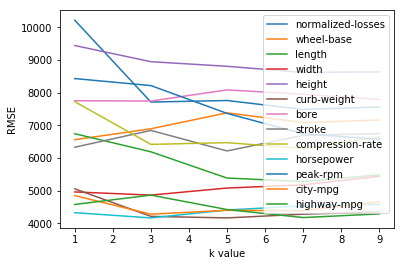

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y, label=k)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.legend(loc="upper right")

# Multi-variate

* Modify the knn_train_test() function to accept a list of column names (instead of just a string). Modify the rest of the function logic to use this parameter:
  * Instead of using just a single column for train and test, use all of the columns passed in.
  * Use a the default k value from scikit-learn for now (we'll tune the k value in the next step).
* Use the best 2 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
* Use the best 3 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
* Use the best 4 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
* Use the best 5 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
* Display all of the RMSE values.

In [48]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

knn_train_test(train_cols,'price',numeric_cars)


{5: 4163.8546061775669}

In [55]:
k_rmse_results = {}

two_best_features = ['horsepower', 'width']
rmse_val = knn_train_test(two_best_features, 'price', numeric_cars)
k_rmse_results["two best features"] = rmse_val

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results["five best features"] = rmse_val

six_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg', 'length']
rmse_val = knn_train_test(six_best_features, 'price', numeric_cars)
k_rmse_results["six best features"] = rmse_val

k_rmse_results

{'two best features': {5: 3589.3132622073304},
 'three best features': {5: 3305.9401397969677},
 'four best features': {5: 3280.3807311630976},
 'five best features': {5: 3341.6024539726504},
 'six best features': {5: 3628.2611882141268}}

# Vary hyperparameter

For the top 3 models in the last step, vary the hyperparameter value from 1 to 25 and plot the resulting RMSE values.
Which k value is optimal for each model? How different are the k values and what accounts for the differences?

In [57]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results["five best features"] = rmse_val

k_rmse_results

{'three best features': {1: 3013.0109985241875,
  2: 2813.2859698259972,
  3: 3171.5852844786741,
  4: 3182.3137417981943,
  5: 3305.9401397969677,
  6: 3522.5068489003761,
  7: 3774.3772094554106,
  8: 3978.9691240211159,
  9: 3992.9236805888809,
  10: 4076.2381473803043,
  11: 4156.3883311318068,
  12: 4201.1071338594802,
  13: 4303.6267686132496,
  14: 4359.6932969897016,
  15: 4371.7711033728683,
  16: 4394.4846551644205,
  17: 4510.3997100574061,
  18: 4584.3109618654862,
  19: 4636.6262047706296,
  20: 4664.4658478668107,
  21: 4724.0966374282734,
  22: 4752.5354841029139,
  23: 4808.7033104521006,
  24: 4858.9452710176065},
 'four best features': {1: 2516.5892799502258,
  2: 2811.1727257604443,
  3: 3013.3615157930335,
  4: 3126.2694826412612,
  5: 3280.3807311630976,
  6: 3479.5099401018138,
  7: 3781.5612742414464,
  8: 3988.8669577450623,
  9: 4024.9986213622451,
  10: 4042.2472261878988,
  11: 4230.3352486840677,
  12: 4354.0086751540612,
  13: 4461.6266648777882,
  14: 4468

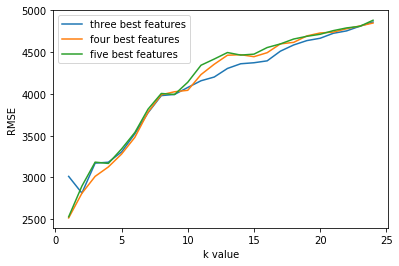

In [60]:
for  k,v  in  k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y,label=k)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.legend()

# Next steps:

Modify the knn_train_test() function to use k-fold cross validation instead of test/train validation.
Modify the knn_train_test() function to perform the data cleaning as well.

# k-fold cross validation 
First, we instantiate an instance of the KFold class from sklearn.model_selection:


from sklearn.model_selection import KFold
kf = KFold(n_splits, shuffle=False, random_state=None)
where:
n_splits is the number of folds you want to use,
shuffle is used to toggle shuffling of the ordering of the observations in the dataset,
random_state is used to specify the random seed value if shuffle is set to True.
You'll notice here that no parameters depend on the data set at all. This is because the KFold class returns an iterator object which we use in conjunction with the cross_val_score() function, also from sklearn.model_selection. Together, these 2 functions allow us to compactly train and test using k-fold cross validation:

Here are the relevant parameters for the cross_val_score function:
from sklearn.model_selection import cross_val_score
cross_val_score(estimator, X, Y, scoring=None, cv=None)

where:
estimator is a sklearn model that implements the fit method (e.g. instance of KNeighborsRegressor),
X is the list or 2D array containing the features you want to train on,
y is a list containing the values you want to predict (target column),
scoring is a string describing the scoring criteria (list of accepted values here).
cv describes the number of folds. 

Here are some examples of accepted values:
an instance of the KFold class,
an integer representing the number of folds.
Depending on the scoring criteria you specify, a single total value is returned for each fold. Here's the general workflow for performing k-fold cross-validation using the classes we just described:

instantiate the scikit-learn model class you want to fit,
instantiate the KFold class and using the parameters to specify the k-fold cross-validation attributes you want,
use the cross_val_score() function to return the scoring metric you're interested in.

In [82]:
from sklearn.model_selection import cross_val_score, KFold
def knn_train_test(train_cols, target_col, df):
    kf = KFold(5, shuffle=True, random_state=1)
    knn = KNeighborsRegressor(5)

    mses = cross_val_score(knn, df[train_cols], df[target_col], scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)
    return avg_rmse

In [83]:
k_rmse_results = {}

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results["five best features"] = rmse_val

k_rmse_results

{'three best features': 3027.7487021204315,
 'four best features': 2931.1608893797184,
 'five best features': 3006.1022051107061}